
## Author MArktus Atanga

### __The simulated annealing algorithm__

The simulated annealing algorithm is a random approached to unconstrained optimization and is inspired by the annealing process used in metallurgy. meallurgy is a domain of materials science and engineering that studies the physical and chemical behavior of metallic elements, their inter-metallic compounds, and their mixtures, which are known as alloys. https://en.wikipedia.org/wiki/Metallurgy

In metallurgy and materials science, annealing is a heat treatment that alters the physical and sometimes chemical properties of a material to increase its ductility and reduce its hardness, making it more workable. If the cooling process is done very slowly, internal stresses can be avoided, thereby creating a very strong metal. Internal stresses generate weak points for failure (cracks) to occur. The thermodynamic underpinning of annealing is the difussion of atoms within the metal such that the material progresses to an equilibrium state. Annealing occurs in three stages; recovery, recrystallization, and grain growth.Each of this stage ensures different properties are developed in the metal. The nature of the cooling is determined by the cooling/annealing schedule (the control of the cooling temperatue). By lowering temperature, it lowers the enegy of the system and draws it to an equilibrium state. 
There are three widely used forms of the annealing schedules; 

__1. Geometric__: $T(t) = T_{0}{\alpha}^t, \;\; \; \;        0<\alpha<1, \; \; \; t = 1, 2, ..., t_{f}$. Practioners suggest an ${\alpha} {\in} [0.75, 0.95]$

__2. Linear__: $T(t) = T_{0} -{\beta}t.   \;  \;  \; \;   Where \; \; \beta = \frac{T_{0}-T_{min}}{T_{f}}$

__3. Inverse Linear__: $T(t) = \frac{T_{0}}{1+ \gamma{t}}.   \;  \;  \; \;  \gamma >0, \; \; \; t = 1, 2, ..., t_{f}$

__The Simulated Annealing Algorithm (SA)__ is a trajecory based (Markov chain by random walk) stochastic algorithm that is inspired by the annealing process. The algorithm can be shown to converge to a global optimum given enough randomness combined with slow cooling. For this algorithm, a better solution is always accepted while a worst solution is accepted with some positive probability.

The SA algorithm in its basic form consists of the following steps:

1. Generate an initial solution at random, called it $x$


2. Determine an intitial temperature T (high temperature) and a final temperature $T_{min}$ (a low temperature. Keep in mind that annealing is a cooling process, so the algorithm progresses from higher temperature to lower temperature. 

    2.1. The choice of the initial temperature is criticaly important to the success of the SA algorithm. Minimum may not be obatined if the initial temperature is too high and the algorithm could easily get stuck in a local minimum if the initial temperature is too low. A suitable initial temperature ($T_{0}$) is obtained such that the probability of accepting a move is equal to a predtermined high $P_{0}$ during the first stage of cooling (some L steps). Typical value for $P_{0} \approx 0.8$. Run the algorithm for L-steps without rejecting any moves and compute the average of the objective funtion the L number of steps, $\Delta_{f}$. $T_{0} = -\frac{\Delta_{f}}{\ln{P_{0}}}$
    
    2.2.1 The final temperature can be determined by total number of different temperature vallues to be used
    
    2.2.2 The final temperature can also be determine by stopping the algorithm when it ceases to make progress. Lack of progress is defined by no improvement found at one temperature and/or an acceptance ratio falling below user-specicied small value $p_{r}$.
    

3. Determine the number iterations to run at a given temperatture (T), call this $i_{max}(T)$. if too few iterations are used, the method may not converge to a global optimum and the method becomes computationally expensive if too many iterations are used. Thus, the number of iterations have to be "approximately" right. The common ways are

    3.1. A fixed number of iterations at each temperature
    
    3.2. Vary the number of iterations at each temperature. As the temperature cools, the number of iterations increase, thereby allowing one to fully explore the neighborhood of a given solution.
    
    
4. Calculate the objective function value at the genrated solution x,  $\phi{(x)} = f(x) + rP(x)$, where P(x) is a penalty term.


5. Set old_cost = $\phi{(x)}$


6. While $T > T_{min}$:
    
        Execute the main loop of operations discussed below.
    
   End while
   
7. Main loop of the algorithm:
    
    Set iteration counter i = 1
    
    while i <= $i_{max}(T)$:
        
      Generate $x^\prime$ = neighborhood(x)
        
      Calculate the objective function  $\phi{(x^\prime)}$     
        
      Set new_cost = $\phi{(x^\prime)}$
      
      If new_cost <= odl_cost:
      
      set x = $x^\prime$
      
      old_cost = new_cost
      
      Else:
      
      $\Delta{f} = new_cost - old_cost$
      
      $p = \exp(\frac{-\Delta{f}}{T})$; where p is the Metropolis acceptance criterion
      
      Select a number r, uniformly and at random from [0, 1]
      
      if p>r:
      
      $set \;  \; x = x^\prime$
      
      set old_cost = new_cost
      
      End if
      
      End if
      
     set i = i+1
     
    End while
    
    Reduce the T according to the annealing schedule 
    
### About the Metropolis acceptance criterion

In [1]:
import numpy as np
import pandas as pd
from random import random, gauss, uniform
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option('precision', 7)
%precision %.2f

'%.2f'

In [60]:
def generate_init_solution(lower_bound, upper_bound, dimension):
    return list(np.random.uniform(lower_bound, upper_bound, dimension))

def get_neighborhood(soultion, dimension):
    """
    Given the current x, a neighbor of this point is created using the formula
    x + (2r1 − 1)*[1,0] + (2r2 − 1)*[0, 1] 
    wgere r1, r2 are random draws from a uniform distribution over the interval [0,1]
    """
    neighbor_solution = [0]*dimension #initialize neighbors
    r = np.random.uniform(0, 1, dimension) #random draw uniform distribution
    for i in range(0, dimension):
        neighbor_solution[i] = soultion[i]+(2*r[i]-1)
    return neighbor_solution
    
def objective_funtion(X):
    obj_value = 2*X[0]**2 + X[0]**3 + 4*X[1]**2 + X[1]**3
    return obj_value

def initial_temperature(solution):
    numb_vars = len(solution)
    save_objective = []
    p_0 = 0.8
    i = 1
    while i <= 100: # L= 100 iterations
        new_solution = get_neighborhood(solution, numb_vars)
        objective_value =  objective_funtion(new_solution)       
        solution = new_solution
        save_objective.append(solution)
        i = i+1
    init_temp = -np.mean(save_objective)/np.log(p_0)
    return init_temp

def cooling_curve(Tmax, iter_num):
    """
    The cooling curve in this example is a function of the maximum temperature. 
    It returns the temperature at the ith iteration    
    """
    cooling = 0.75**iter_num*Tmax
    return cooling

def geometric_cooling(Tmax, iter_num, beta=None):
    if alpha==None:
        alpha = np.random.uniform(0.75, 0.95, 1) #draw alpha from [0.75, 0.95]
        cooling = Tmax*alpha**iter_num
    return cooling

def linear_cooling(Tmax, iter_num, alpha=None):
        alpha = np.random.uniform(0.75, 0.95, 1) #draw alpha from [0.75, 0.95]
        cooling = Tmax - (iter_num)
    return cooling

def inverse_cooling(Tmax, iter_num, Gamma=None):
        Gamma = np.random.uniform(0.75, 0.95, 1) #draw alpha from [0.75, 0.95]
        cooling = Tmax/(1+gamma*iter_num)
    return cooling

def final_temperature():
    
    return

def penalty(solution):
    penalties = 𝑟*𝑃(solution)
    return penalties

In [61]:
init_sol = generate_init_solution(lower_bound=0, upper_bound=100, dimension=2)
initial_temperature(init_sol)

123.07354985891902

In [77]:
def simulated_annealing(solution, Tmin, Tmax, alpha=None, beta=None, gamma=None, imax):
    old_cost = objective_funtion(solution) #calculate the objective function value
    numb_vars = len(solution)
    solution_saved, obj_saved = [], []
    print('initial values','f(%s) = %.3f' % (solution, old_cost))
    T = Tmax
    j = 1
    while T > Tmin: #50 is a chosen final temperature
        print('at T = ', T)
        i = 1
        while i <= imax: #number of iterations at a given temperature
            new_solution = get_neighborhood(solution, numb_vars)  #calculate the neigbhorhood value
            objective_value =  objective_funtion(new_solution)
            new_cost = objective_value
            
            if new_cost <= old_cost:
                solution, old_cost = new_solution, new_cost
            deltaf = new_cost-old_cost
        
            #Calculate Metropolis acceptance probability
            metropolis = np.exp(-deltaf/T) 
            random_numb = np.random.uniform(0, 1, 1)
            
            if metropolis > random_numb:
                solution, old_cost=new_solution, new_cost
            solution_saved.append(solution); obj_saved.append(old_cost) 
            print('>%d  T=%.3f, delta=%0.3f,  metropolis=%.3f, random_numb=%0.3f, f(%s)=%.3f'%(
                i, T, deltaf, metropolis, random_numb, solution, old_cost))
            i = i+1
        print() 
        j = j+1
        #T = cooling_curve(Tmax, j) #reduce temperature using the cooling curve
        T = geometric_cooling(Tmax, j)
        
    return solution_saved, obj_saved

In [78]:
Tmax = 100 #initial temperature

init_sol = generate_init_solution(lower_bound=0, upper_bound=100, dimension=2)

Tmax = initial_temperature(init_sol)

solution = [-0.5, -0.5] #initial solution

SA = simulated_annealing(solution= solution, Tmin=25, Tmax=Tmax, imax=3)

initial values f([-0.5, -0.5]) = 1.250
at T =  237.4895998766012
>1  T=237.490, delta=2.560,  metropolis=0.989, random_numb=0.912, f([-0.7161931905667789, -1.0300353636857258])=3.810
>2  T=237.490, delta=0.000,  metropolis=1.000, random_numb=0.174, f([-1.2715836785793042, -0.9246994869907303])=3.807
>3  T=237.490, delta=0.000,  metropolis=1.000, random_numb=0.390, f([-1.1571131868049296, -0.04094261761792617])=1.135

at T =  [161.23572502]
>1  T=161.236, delta=0.486,  metropolis=0.997, random_numb=0.168, f([-1.4226479324347925, -0.35218044792869874])=1.621
>2  T=161.236, delta=0.000,  metropolis=1.000, random_numb=0.048, f([-0.7633327128964671, -0.17932888574924877])=0.843
>3  T=161.236, delta=0.312,  metropolis=0.998, random_numb=0.841, f([-1.5828015794600785, -0.16938338283703147])=1.155

at T =  [122.49135705]
>1  T=122.491, delta=1.583,  metropolis=0.987, random_numb=0.059, f([-1.298995286096792, -0.6848939263934974])=2.738
>2  T=122.491, delta=0.000,  metropolis=1.000, random_numb

In [6]:
a_list = [2.45564322, 4.776654332, 6.99000999887, 8.0000000009]
string_list = ["%i: %s" % (index, value) for index, value in enumerate(a_list)]
print(string_list)

['0: 2.45564322', '1: 4.776654332', '2: 6.99000999887', '3: 8.0000000009']


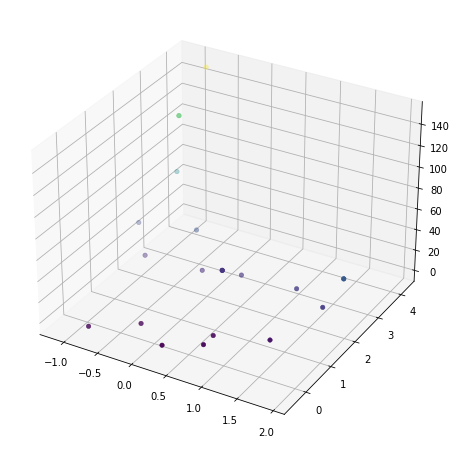

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (15, 8))
ax = plt.axes(projection='3d')
xdata = np.array([SA[0][i][0] for i in range(len(SA[0]))])
ydata = np.array([SA[0][i][1] for i in range(len(SA[0]))])
zdata = np.array(SA[1])
#ax.plot3D(xdata, ydata, zdata, 'gray')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis', linewidth=0.5)
#ax.plot_surface(xdata, ydata, zdata, c=zdata, cmap='viridis', linewidth=0.5)
plt.show()

In [8]:
soultion = [-0.5, -0.5]
dimension = len(soultion)
neighbor_solution = [0]*dimension #initialize neighbors

for i in range(0, dimension):
    neighbor_solution[i] = gauss(0, 2)*soultion[i]
neighbor_solution

[-1.08, -0.41]

In [9]:
neighbor_solution = [0]*dimension #initialize neighbors
r = np.random.uniform(0, 1, dimension) #random draw deom uniform distribution

for i in range(0, dimension):
    neighbor_solution[i] = soultion[i]+(2*r[i]-1)
neighbor_solution

[0.4916956245331783, 0.25960698913638414]

In [10]:
fx = lambda x: 2*x_1**2 + 4*x_2**2 + x_1**3 + x_2**3 